# Comparing SVM with Random Forest

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import sklearn.metrics as sm
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pylab as pl

### 1. Data Processing

##### a) Import the data: You are provided separate .csv files for train and test.

Train shape: (507, 148)  
Test shape: (168, 148)

In [2]:
# Read the data
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [3]:
#Print the dataset shape
print(train.shape)
print(test.shape)

(507, 148)
(168, 148)


##### b) Remove any rows that have missing data across both sets of data.

In [4]:
#Drop records with missing rows
train.dropna(inplace=True, axis = 0)
test.dropna(inplace=True, axis = 0)

#Print the dataset shape
print(train.shape)
print(test.shape)

(507, 148)
(168, 148)


##### c) The target variable (dependent variable) is called "class", make sure to separate this out into a "y_train" and "y_test" and remove from your "X_train" and "X_test". 

In [5]:
#Create the train and test variables
X_train = train.drop(['class'], axis = 1)
y_train = train['class']

X_test = test.drop(['class'], axis = 1)
y_test = test['class']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((507, 147), (507,), (168, 147), (168,))

##### d) Scale all features / predictors (NOT THE TARGET VARIABLE)

In [6]:
sc = StandardScaler().fit(X_train)

X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform (X_test)

### 2. Random Forest Classifier - Base Model:

##### a) Use the RandomForestClassifier in sklearn. Fit your model on the training data.

In [7]:
#Create an instance of the Random forest classifier
rf = RandomForestClassifier(random_state=42)

In [8]:
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

##### b) Use the fitted model to predict on test data. Use the .predict() method to get the predicted classes.

In [9]:
y_pred_rf = rf.predict(X_test_scaled)
y_pred_rf

array(['car ', 'concrete ', 'building ', 'concrete ', 'concrete ',
       'grass ', 'car ', 'car ', 'building ', 'tree ', 'building ',
       'asphalt ', 'building ', 'grass ', 'shadow ', 'building ', 'tree ',
       'soil ', 'building ', 'shadow ', 'pool ', 'asphalt ', 'concrete ',
       'tree ', 'grass ', 'concrete ', 'grass ', 'building ', 'building ',
       'building ', 'asphalt ', 'shadow ', 'concrete ', 'grass ', 'tree ',
       'concrete ', 'asphalt ', 'concrete ', 'tree ', 'concrete ',
       'concrete ', 'tree ', 'building ', 'building ', 'building ',
       'grass ', 'grass ', 'shadow ', 'concrete ', 'soil ', 'shadow ',
       'tree ', 'car ', 'car ', 'asphalt ', 'pool ', 'building ', 'tree ',
       'grass ', 'grass ', 'car ', 'car ', 'pool ', 'building ', 'soil ',
       'grass ', 'building ', 'building ', 'building ', 'soil ',
       'concrete ', 'building ', 'asphalt ', 'pool ', 'pool ', 'shadow ',
       'building ', 'grass ', 'asphalt ', 'asphalt ', 'pool ', 'pool ',


##### c) Calculate the confusion matrix and classification report for the test data. 

In [10]:
cm_train = sm.confusion_matrix(y_test,y_pred_rf)
cm_train

array([[14,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 22,  0,  2,  0,  0,  0,  0,  0],
       [ 1,  1, 13,  0,  0,  0,  0,  0,  0],
       [ 0,  5,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 25,  0,  0,  0,  4],
       [ 1,  0,  1,  0,  0, 13,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0, 13,  0,  0],
       [ 0,  1,  0,  5,  3,  0,  0,  5,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0, 15]], dtype=int64)

<Figure size 1440x1440 with 0 Axes>

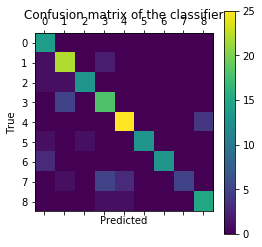

In [11]:
fig = plt.figure(figsize=(20,20))
pl.matshow(cm_train)
pl.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
pl.colorbar()
plt.show()

In [12]:
#Classification report
print(sm.classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

    asphalt        0.70      1.00      0.82        14
   building        0.76      0.88      0.81        25
        car        0.93      0.87      0.90        15
   concrete        0.69      0.78      0.73        23
      grass        0.86      0.86      0.86        29
       pool        1.00      0.87      0.93        15
     shadow        1.00      0.81      0.90        16
       soil        1.00      0.36      0.53        14
       tree        0.79      0.88      0.83        17

    accuracy                           0.82       168
   macro avg       0.86      0.81      0.81       168
weighted avg       0.85      0.82      0.82       168



##### d)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [13]:
y_pred_train = rf.predict(X_train_scaled)

In [14]:
cm_train = sm.confusion_matrix(y_train,y_pred_train)
cm_train

array([[45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 97,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 93,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 83,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 20,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 89]], dtype=int64)

<Figure size 1440x1440 with 0 Axes>

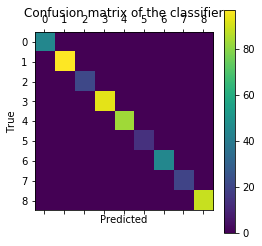

In [15]:
fig = plt.figure(figsize=(20,20))
pl.matshow(cm_train)
pl.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
pl.colorbar()
plt.show()

In [16]:
print(sm.classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        1.00      1.00      1.00        97
        car        1.00      1.00      1.00        21
   concrete        1.00      1.00      1.00        93
      grass        1.00      1.00      1.00        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      1.00      1.00        20
       tree        1.00      1.00      1.00        89

    accuracy                           1.00       507
   macro avg       1.00      1.00      1.00       507
weighted avg       1.00      1.00      1.00       507



**Explanation** - As can be seen from the classification report - precision, recall, f1-score all have value of 1. Also the confusion matrix is showing all classes are classified correctly. This indicates clear overfitting to the training data.

##### e) Identify the top 5 features. Feel free to print a list OR to make a plot. 

In [17]:
featureImp= []
for feat, importance in zip(X_train.columns, rf.feature_importances_):
    temp = [feat, importance*100]
    featureImp.append(temp)
fT_df = pd.DataFrame(featureImp, columns = ['Feature', 'Importance'])
#print (fT_df.sort_values('Importance', ascending = False))

fT_df = fT_df.sort_values('Importance', ascending = False)

#Print the top 5 features
fT_df[0:5]

,Feature,Importance
18,NDVI,4.275033
8,Mean_NIR,2.936951
28,Mean_R_40,2.897001
60,NDVI_60,2.778715
29,Mean_NIR_40,2.598406


### 3. LinearSVM Classifier - Base Model:

##### a) Use the LinearSVC in sklearn. Fit your model on the training data.

In [18]:
lsvc = LinearSVC(random_state = 42)

In [19]:
lsvc.fit(X_train_scaled, y_train)

C:\Users\shash\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(random_state=42)

##### b) Use the fitted model to predict on test data. Use the .predict() method to get the predicted classes.

In [20]:
y_pred_lsvc = lsvc.predict(X_test_scaled)
y_pred_lsvc

array(['car ', 'concrete ', 'building ', 'concrete ', 'asphalt ',
       'grass ', 'car ', 'car ', 'building ', 'tree ', 'building ',
       'asphalt ', 'building ', 'grass ', 'shadow ', 'building ',
       'grass ', 'building ', 'building ', 'shadow ', 'pool ', 'shadow ',
       'concrete ', 'grass ', 'grass ', 'concrete ', 'grass ',
       'building ', 'building ', 'building ', 'asphalt ', 'shadow ',
       'soil ', 'grass ', 'grass ', 'building ', 'asphalt ', 'concrete ',
       'tree ', 'concrete ', 'soil ', 'tree ', 'building ', 'building ',
       'building ', 'grass ', 'grass ', 'shadow ', 'building ', 'soil ',
       'shadow ', 'tree ', 'car ', 'car ', 'shadow ', 'pool ',
       'building ', 'grass ', 'grass ', 'grass ', 'car ', 'building ',
       'pool ', 'car ', 'soil ', 'grass ', 'building ', 'building ',
       'building ', 'soil ', 'concrete ', 'building ', 'car ', 'pool ',
       'pool ', 'shadow ', 'building ', 'grass ', 'shadow ', 'building ',
       'building ', 'pool

##### c) Calculate the confusion matrix and classification report for test data.

In [21]:
cm_train = sm.confusion_matrix(y_test,y_pred_lsvc)
cm_train

array([[13,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 21,  1,  1,  1,  0,  0,  1,  0],
       [ 0,  2, 12,  0,  0,  0,  0,  0,  1],
       [ 1,  6,  1, 15,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1, 26,  0,  0,  0,  2],
       [ 1,  1,  1,  0,  0, 12,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0, 14,  0,  0],
       [ 0,  4,  0,  1,  3,  0,  0,  6,  0],
       [ 0,  0,  0,  1,  6,  0,  0,  0, 10]], dtype=int64)

<Figure size 1440x1440 with 0 Axes>

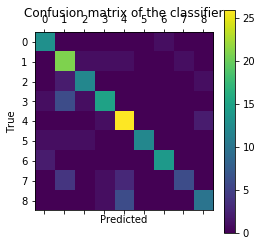

In [22]:
fig = plt.figure(figsize=(20,20))
pl.matshow(cm_train)
pl.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
pl.colorbar()
plt.show()

In [23]:
#Classification report
print(sm.classification_report(y_test,y_pred_lsvc))

              precision    recall  f1-score   support

    asphalt        0.76      0.93      0.84        14
   building        0.62      0.84      0.71        25
        car        0.80      0.80      0.80        15
   concrete        0.79      0.65      0.71        23
      grass        0.72      0.90      0.80        29
       pool        1.00      0.80      0.89        15
     shadow        0.93      0.88      0.90        16
       soil        0.86      0.43      0.57        14
       tree        0.77      0.59      0.67        17

    accuracy                           0.77       168
   macro avg       0.81      0.76      0.77       168
weighted avg       0.79      0.77      0.76       168



##### d)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [24]:
y_pred_train_lsvc = lsvc.predict(X_train_scaled)

In [25]:
cm_train = sm.confusion_matrix(y_train,y_pred_train_lsvc)
cm_train

array([[45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 97,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 93,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 80,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 20,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 89]], dtype=int64)

<Figure size 1440x1440 with 0 Axes>

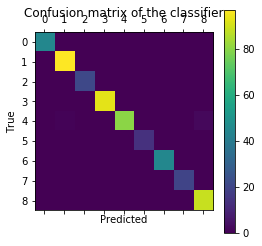

In [26]:
fig = plt.figure(figsize=(20,20))
pl.matshow(cm_train)
pl.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
pl.colorbar()
plt.show()

In [27]:
print(sm.classification_report(y_train,y_pred_train_lsvc))

              precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        0.99      1.00      0.99        97
        car        1.00      1.00      1.00        21
   concrete        1.00      1.00      1.00        93
      grass        1.00      0.96      0.98        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      1.00      1.00        20
       tree        0.98      1.00      0.99        89

    accuracy                           0.99       507
   macro avg       1.00      1.00      1.00       507
weighted avg       0.99      0.99      0.99       507



**Explanation** - As per the confusion matrix, most of the classes are classified correctly. The precision, recall and f1-score for most of the classes are either 1 or very close to 1. This indicates overfitting to the data.

### 4. Support Vector Machine Classifier + Linear Kernel + Grid Search:

##### a) Use SVC from sklearn with kernel = "linear". Run the GridSearchCV using the following (SVMs run much faster than RandomForest):

C: 0.01 - 10 in increments of 0.2 (consider using the np.arange() method from numpy to build out a sequence of values)

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and the default scoring. Please set verbose = 0 to reduce the printing (sorry to our grader for not specifying this last week!).

In [28]:
list_c = [i for i in np.arange(0.01,10,0.2)]
param_grid = {
    'C' : list_c
    }


# create SVC Classifier model 
svc_4 = SVC(kernel='linear', random_state=42)


# Create gridsearch object with various combinations of parameters
svc_Grid = GridSearchCV(svc_4, param_grid, cv = 5, n_jobs=-1, verbose = 0)

In [29]:
svc_Grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.21000000000000002, 0.41000000000000003,
                               0.6100000000000001, 0.81, 1.01,
                               1.2100000000000002, 1.4100000000000001, 1.61,
                               1.81, 2.01, 2.21, 2.41, 2.61, 2.81, 3.01, 3.21,
                               3.41, 3.61, 3.81, 4.01, 4.21, 4.41, 4.61,
                               4.8100000000000005, 5.01, 5.21, 5.41, 5.61,
                               5.8100000000000005, ...]})

##### b) Identify the best performing model:

.best_params_() : This method outputs to best performing parameters  
.best_estimator_() : This method outputs the best performing model, and can be used for predicting on the X_test

In [30]:
svc_Grid.best_params_

{'C': 0.01}

In [31]:
svc_Grid.best_estimator_

SVC(C=0.01, kernel='linear', random_state=42)

##### c) Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.

In [32]:
svc_4 = SVC(C=0.01, kernel='linear', random_state=42)

svc_4.fit(X_train_scaled,y_train)

SVC(C=0.01, kernel='linear', random_state=42)

In [33]:
y_pred_svc_4 = svc_4.predict(X_test_scaled)
y_pred_svc_4 

array(['car ', 'concrete ', 'building ', 'concrete ', 'concrete ',
       'grass ', 'car ', 'car ', 'building ', 'tree ', 'building ',
       'asphalt ', 'building ', 'grass ', 'shadow ', 'building ', 'tree ',
       'concrete ', 'building ', 'shadow ', 'pool ', 'shadow ',
       'concrete ', 'tree ', 'grass ', 'concrete ', 'grass ', 'building ',
       'building ', 'building ', 'asphalt ', 'shadow ', 'concrete ',
       'grass ', 'tree ', 'concrete ', 'asphalt ', 'concrete ', 'grass ',
       'concrete ', 'concrete ', 'tree ', 'building ', 'building ',
       'building ', 'grass ', 'grass ', 'shadow ', 'building ',
       'building ', 'shadow ', 'tree ', 'car ', 'car ', 'shadow ',
       'pool ', 'building ', 'tree ', 'grass ', 'grass ', 'car ', 'car ',
       'pool ', 'building ', 'soil ', 'grass ', 'building ', 'building ',
       'building ', 'soil ', 'concrete ', 'building ', 'shadow ', 'pool ',
       'pool ', 'shadow ', 'building ', 'grass ', 'shadow ', 'building ',
       'pool

##### d) Calculate the confusion matrix and classification report for test data.

In [34]:
cm_train = sm.confusion_matrix(y_test,y_pred_svc_4)
cm_train

array([[13,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 22,  0,  2,  1,  0,  0,  0,  0],
       [ 0,  1, 14,  0,  0,  0,  0,  0,  0],
       [ 0,  5,  0, 17,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  1, 25,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0, 14,  1,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 15,  0,  0],
       [ 0,  3,  0,  5,  2,  0,  0,  4,  0],
       [ 0,  0,  0,  1,  2,  0,  0,  0, 14]], dtype=int64)

<Figure size 1440x1440 with 0 Axes>

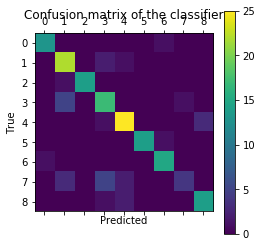

In [35]:
fig = plt.figure(figsize=(20,20))
pl.matshow(cm_train)
pl.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
pl.colorbar()
plt.show()

In [36]:
print(sm.classification_report(y_test,y_pred_svc_4))

              precision    recall  f1-score   support

    asphalt        0.93      0.93      0.93        14
   building        0.71      0.88      0.79        25
        car        1.00      0.93      0.97        15
   concrete        0.65      0.74      0.69        23
      grass        0.83      0.86      0.85        29
       pool        1.00      0.93      0.97        15
     shadow        0.88      0.94      0.91        16
       soil        0.80      0.29      0.42        14
       tree        0.82      0.82      0.82        17

    accuracy                           0.82       168
   macro avg       0.85      0.81      0.82       168
weighted avg       0.83      0.82      0.81       168



##### e)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [37]:
y_pred_train = svc_4.predict(X_train_scaled)

In [38]:
cm_train = sm.confusion_matrix(y_train,y_pred_train)
cm_train

array([[40,  0,  0,  0,  0,  0,  5,  0,  0],
       [ 2, 87,  0,  7,  0,  0,  1,  0,  0],
       [ 0,  1, 19,  1,  0,  0,  0,  0,  0],
       [ 0,  9,  0, 83,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 70,  0,  0,  0, 12],
       [ 0,  1,  0,  0,  1, 12,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 43,  0,  1],
       [ 0,  3,  0,  4,  2,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  3,  0,  1,  0, 85]], dtype=int64)

<Figure size 1440x1440 with 0 Axes>

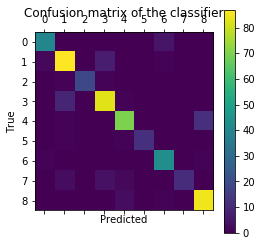

In [39]:
fig = plt.figure(figsize=(20,20))
pl.matshow(cm_train)
pl.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
pl.colorbar()
plt.show()

In [40]:
print(sm.classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

    asphalt        0.93      0.89      0.91        45
   building        0.85      0.90      0.87        97
        car        1.00      0.90      0.95        21
   concrete        0.87      0.89      0.88        93
      grass        0.91      0.84      0.88        83
       pool        1.00      0.86      0.92        14
     shadow        0.86      0.96      0.91        45
       soil        1.00      0.55      0.71        20
       tree        0.87      0.96      0.91        89

    accuracy                           0.89       507
   macro avg       0.92      0.86      0.88       507
weighted avg       0.89      0.89      0.89       507



**Explanation** - This model is performing better than the random forest and linear svc with better test accuracy. None of the parameter - precision, recall and f1-score are close to 1. Moreover, the parameters for test and train are very close indicating there is no overfitting.

### 5. Support Vector Machine Classifier + Polynomial Kernel + Grid Search:

We will now use GridSearchCV to try various hyperparameters in a SVM with a polynomial kernel.

##### a) Use SVC from sklearn with kernel = "poly". Run the GridSearchCV using the following:

C: 0.01 - 10 in increments of 0.2  
degree: 2, 3, 4, 5, 6

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and the default scoring.

In [41]:
list_c = [i for i in np.arange(0.01,10,0.2)]
param_grid = {
    'C' : list_c,
    'degree' : [2,3,4,5,6]
    }


# create SVC Classifier model 
svc_5 = SVC(kernel='poly', random_state=42)


# Create gridsearch object with various combinations of parameters
svc5_Grid = GridSearchCV(svc_5, param_grid, cv = 5, n_jobs=-1, verbose = 0)

In [42]:
svc5_Grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly', random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.21000000000000002, 0.41000000000000003,
                               0.6100000000000001, 0.81, 1.01,
                               1.2100000000000002, 1.4100000000000001, 1.61,
                               1.81, 2.01, 2.21, 2.41, 2.61, 2.81, 3.01, 3.21,
                               3.41, 3.61, 3.81, 4.01, 4.21, 4.41, 4.61,
                               4.8100000000000005, 5.01, 5.21, 5.41, 5.61,
                               5.8100000000000005, ...],
                         'degree': [2, 3, 4, 5, 6]})

##### b) Identify the best performing model:

.best_params_() : This method outputs to best performing parameters  
.best_estimator_() : This method outputs the best performing model, and can be used for predicting on the X_test

In [43]:
svc5_Grid.best_params_

{'C': 3.81, 'degree': 3}

In [44]:
svc5_Grid.best_estimator_

SVC(C=3.81, kernel='poly', random_state=42)

##### c) Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.

In [45]:
svc_5 = SVC(C=3.81, kernel='poly', random_state=42, degree = 3)

svc_5.fit(X_train_scaled,y_train)

SVC(C=3.81, kernel='poly', random_state=42)

In [46]:
y_pred_svc_5 = svc_5.predict(X_test_scaled)
y_pred_svc_5 

array(['soil ', 'concrete ', 'building ', 'concrete ', 'concrete ',
       'grass ', 'car ', 'car ', 'building ', 'tree ', 'building ',
       'asphalt ', 'building ', 'soil ', 'shadow ', 'building ', 'tree ',
       'concrete ', 'building ', 'shadow ', 'pool ', 'asphalt ',
       'concrete ', 'grass ', 'grass ', 'concrete ', 'grass ',
       'building ', 'building ', 'building ', 'asphalt ', 'shadow ',
       'concrete ', 'grass ', 'tree ', 'concrete ', 'asphalt ',
       'concrete ', 'grass ', 'concrete ', 'concrete ', 'tree ',
       'building ', 'building ', 'building ', 'grass ', 'grass ',
       'shadow ', 'building ', 'grass ', 'shadow ', 'tree ', 'car ',
       'car ', 'shadow ', 'pool ', 'building ', 'tree ', 'grass ',
       'grass ', 'car ', 'car ', 'pool ', 'building ', 'grass ', 'grass ',
       'building ', 'building ', 'building ', 'grass ', 'concrete ',
       'building ', 'shadow ', 'pool ', 'pool ', 'shadow ', 'building ',
       'grass ', 'shadow ', 'building ', 'poo

##### d) Calculate the confusion matrix and classification report for test data.

In [47]:
cm_train = sm.confusion_matrix(y_test,y_pred_svc_5)
cm_train

array([[13,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 22,  0,  2,  1,  0,  0,  0,  0],
       [ 0,  2, 11,  0,  0,  1,  0,  1,  0],
       [ 0,  5,  0, 17,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0,  1,  2],
       [ 0,  0,  0,  0,  0, 14,  1,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 14,  0,  1],
       [ 0,  2,  0,  5,  7,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  3,  0,  0,  0, 13]], dtype=int64)

<Figure size 1440x1440 with 0 Axes>

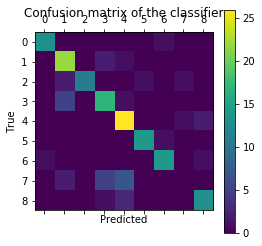

In [48]:
fig = plt.figure(figsize=(20,20))
pl.matshow(cm_train)
pl.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
pl.colorbar()
plt.show()

In [49]:
print(sm.classification_report(y_test,y_pred_svc_5))

              precision    recall  f1-score   support

    asphalt        0.93      0.93      0.93        14
   building        0.71      0.88      0.79        25
        car        1.00      0.73      0.85        15
   concrete        0.68      0.74      0.71        23
      grass        0.68      0.90      0.78        29
       pool        0.93      0.93      0.93        15
     shadow        0.88      0.88      0.88        16
       soil        0.00      0.00      0.00        14
       tree        0.81      0.76      0.79        17

    accuracy                           0.77       168
   macro avg       0.74      0.75      0.74       168
weighted avg       0.73      0.77      0.75       168



##### e)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [50]:
y_pred_train = svc_5.predict(X_train_scaled)

In [51]:
cm_train = sm.confusion_matrix(y_train,y_pred_train)
cm_train

array([[44,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 95,  0,  1,  1,  0,  0,  0,  0],
       [ 0,  0, 20,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0, 91,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 81,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1, 13,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  0,  0,  0, 11,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  5,  0,  0,  0, 84]], dtype=int64)

<Figure size 1440x1440 with 0 Axes>

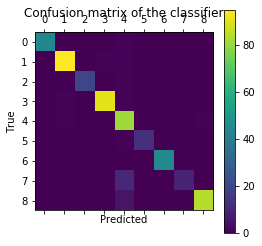

In [52]:
fig = plt.figure(figsize=(20,20))
pl.matshow(cm_train)
pl.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
pl.colorbar()
plt.show()

In [53]:
print(sm.classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

    asphalt        1.00      0.98      0.99        45
   building        0.98      0.98      0.98        97
        car        1.00      0.95      0.98        21
   concrete        0.99      0.98      0.98        93
      grass        0.79      0.98      0.88        83
       pool        1.00      0.93      0.96        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      0.45      0.62        20
       tree        0.99      0.94      0.97        89

    accuracy                           0.95       507
   macro avg       0.97      0.91      0.93       507
weighted avg       0.96      0.95      0.95       507



**Explanation** - As per the confusion matrix, most of the classes are classified correctly. The precision, recall and f1-score for most of the classes are either 1 or very close to 1. The accuracy score of test is 0.77 and for train it is 0.95. All of these parameters indicate overfitting to the data.

### 6. Support Vector Machine Classifier + RBF Kernel + Grid Search:

We will now use GridSearchCV to try various hyperparameters in a SVM with a RBF kernel.

##### a) Use SVC from sklearn with kernel = "rbf". Run the GridSearchCV using the following:

C: 0.01 - 10 in increments of 0.2  
gamma: 0.01,  0.1, 1, 10, 100

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and the default scoring.

In [54]:
list_c = [i for i in np.arange(0.01,10,0.2)]
param_grid = {
    'C' : list_c,
    'gamma' : [0.01,0.1,1,10,100]
    }


# create SVC Classifier model 
svc_6 = SVC(kernel='rbf', random_state=42)


# Create gridsearch object with various combinations of parameters
svc6_Grid = GridSearchCV(svc_6, param_grid, cv = 5, n_jobs=-1, verbose = 0)

In [55]:
svc6_Grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.21000000000000002, 0.41000000000000003,
                               0.6100000000000001, 0.81, 1.01,
                               1.2100000000000002, 1.4100000000000001, 1.61,
                               1.81, 2.01, 2.21, 2.41, 2.61, 2.81, 3.01, 3.21,
                               3.41, 3.61, 3.81, 4.01, 4.21, 4.41, 4.61,
                               4.8100000000000005, 5.01, 5.21, 5.41, 5.61,
                               5.8100000000000005, ...],
                         'gamma': [0.01, 0.1, 1, 10, 100]})

##### b) Identify the best performing model:

.best_params_() : This method outputs to best performing parameters  
.best_estimator_() : This method outputs the best performing model, and can be used for predicting on the X_test

In [56]:
svc6_Grid.best_params_

{'C': 2.81, 'gamma': 0.01}

In [57]:
svc6_Grid.best_estimator_

SVC(C=2.81, gamma=0.01, random_state=42)

##### c) Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.

In [58]:
svc_6 = SVC(C=2.81, gamma=0.01, random_state=42)

svc_6.fit(X_train_scaled,y_train)

SVC(C=2.81, gamma=0.01, random_state=42)

In [59]:
y_pred_svc_6 = svc_6.predict(X_test_scaled)
y_pred_svc_6 

array(['car ', 'concrete ', 'building ', 'concrete ', 'concrete ',
       'grass ', 'car ', 'car ', 'building ', 'tree ', 'building ',
       'asphalt ', 'building ', 'building ', 'shadow ', 'building ',
       'tree ', 'building ', 'building ', 'shadow ', 'pool ', 'asphalt ',
       'concrete ', 'tree ', 'grass ', 'concrete ', 'grass ', 'building ',
       'building ', 'building ', 'asphalt ', 'shadow ', 'concrete ',
       'grass ', 'tree ', 'concrete ', 'asphalt ', 'concrete ', 'tree ',
       'concrete ', 'concrete ', 'tree ', 'building ', 'building ',
       'building ', 'grass ', 'grass ', 'shadow ', 'soil ', 'soil ',
       'shadow ', 'tree ', 'car ', 'car ', 'shadow ', 'pool ',
       'building ', 'tree ', 'grass ', 'grass ', 'car ', 'car ', 'pool ',
       'car ', 'soil ', 'grass ', 'building ', 'building ', 'building ',
       'soil ', 'concrete ', 'building ', 'shadow ', 'pool ', 'pool ',
       'shadow ', 'building ', 'grass ', 'shadow ', 'building ', 'pool ',
       'pool 

##### d) Calculate the confusion matrix and classification report for test data.

In [60]:
cm_train = sm.confusion_matrix(y_test,y_pred_svc_6)
cm_train

array([[13,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 21,  0,  3,  1,  0,  0,  0,  0],
       [ 0,  1, 14,  0,  0,  0,  0,  0,  0],
       [ 0,  4,  0, 19,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 26,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 14,  1,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 15,  0,  0],
       [ 0,  2,  0,  4,  3,  0,  0,  5,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0, 15]], dtype=int64)

<Figure size 1440x1440 with 0 Axes>

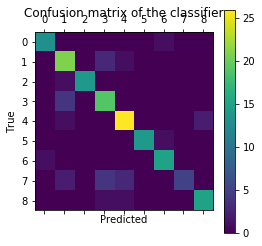

In [61]:
fig = plt.figure(figsize=(20,20))
pl.matshow(cm_train)
pl.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
pl.colorbar()
plt.show()

In [62]:
print(sm.classification_report(y_test,y_pred_svc_6))

              precision    recall  f1-score   support

    asphalt        0.93      0.93      0.93        14
   building        0.72      0.84      0.78        25
        car        1.00      0.93      0.97        15
   concrete        0.70      0.83      0.76        23
      grass        0.84      0.90      0.87        29
       pool        1.00      0.93      0.97        15
     shadow        0.88      0.94      0.91        16
       soil        1.00      0.36      0.53        14
       tree        0.88      0.88      0.88        17

    accuracy                           0.85       168
   macro avg       0.88      0.84      0.84       168
weighted avg       0.86      0.85      0.84       168



##### e)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [63]:
y_pred_train = svc_6.predict(X_train_scaled)

In [64]:
cm_train = sm.confusion_matrix(y_train,y_pred_train)
cm_train

array([[45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 96,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 92,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 81,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 19,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 88]], dtype=int64)

<Figure size 1440x1440 with 0 Axes>

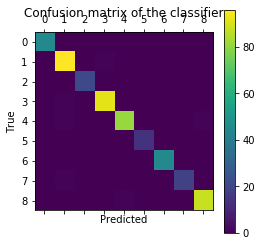

In [65]:
fig = plt.figure(figsize=(20,20))
pl.matshow(cm_train)
pl.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
pl.colorbar()
plt.show()

In [66]:
print(sm.classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        0.97      0.99      0.98        97
        car        1.00      1.00      1.00        21
   concrete        0.99      0.99      0.99        93
      grass        0.99      0.98      0.98        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      0.95      0.97        20
       tree        0.99      0.99      0.99        89

    accuracy                           0.99       507
   macro avg       0.99      0.99      0.99       507
weighted avg       0.99      0.99      0.99       507



**Explanation** - This model is performing better than the random forest and linear svc with better test accuracy. None of the parameter - precision, recall and f1-score are close to 1. Moreover, the parameters for test and train are very close indicating there is no overfitting.

### 7. Conceptual Questions:

##### a) From the models run in steps 2-6, which performs the best based on the Classification Report? Support your reasoning with evidence around your test data. 

**Answer** - Based on the Classification Report, the model Support Vector Machine Classifier + Linear Kernel + Grid Search run in step 4 is the best performing model. The training accuracy for this model is 0.89 and the test accuracy is 0.82. Since there is very less difference between train and test accuracy, there is no overfitting in the model. Additionally, the F-1 score for most of the classes (except for Soil, concrete and car) are above or close to 0.8.  

For all other models, the accuracy between train and test is very high and the training accuracy and f-1 score for most of the classes is close to 1 indicating overfitting.

##### b) Compare models run for steps 4-6 where different kernels were used. What is the benefit of using a polynomial or rbf kernel over a linear kernel? What could be a downside of using a polynomial or rbf kernel?

**Answer** - The model in step 4 is performing better than the models in step 5 and 6. Model is step 4 is not overfitting whereas the models in steps 5 and 6 are overfitting.  
The linear, polynomial and RBF or Gaussian kernel are simply different in case of making the hyperplane decision boundary between the classes. The kernel functions are used to map the original dataset (linear/nonlinear ) into a higher dimensional space with view to making it linear dataset.  
The polynomial and rbf kernels will transform the data into higher dimensions so that it is easier to separate the data using linear boundary of a hyperplane.  
The downside of polynomial and rbf kernels id that it may be computationally expensive to compute all the additional features, especially on large training sets.

##### c) Explain the 'C' parameter used in steps 4-6. What does a small C mean versus a large C in sklearn? Why is it important to use the 'C' parameter when fitting a model? 

**Answer** - In SVC and SVM, the objective is to find a good balance between hard and soft margin to limit the margin violations and to avoid overfitting the model. Scikit learn SVC models use the C parameter for this purpose. A smaller C value leads to a wider margin but more margin violations. High C value the classifier makes fewer margin violations but ends up with a smaller margin and can be prone to overfitting.  
If the SVM model is overfitting, it can be regularized by using the C parameter.

##### d) Scaling our input data does not matter much for Random Forest, but it is a critical step for Support Vector Machines. Explain why this is such a critical step. Also, provide an example of a feature from this data set that could cause issues with our SVMs if not scaled.

**Answer** - Machine learning algorithms that are non tree based just uses numbers and makes decision based on these numbers. So higher numbers get more weightage than lower numbers. This causes the algorithm to give more weightage to these features, which might not necessarily be the case. Hence to bring all the features on the same footing, scaling is used.  
In the case of the data for this assignment, we have some features with value that are in units and some features with values in 100s and some with values in thousands. Features such as GLCM3 have values in thousands and SVM would give more weigtage to this feature over say BrdIndx which has values in the units.

##### e) Describe conceptually what the purpose of a kernel is for Support Vector Machines.

**Answer** - Kernel is used due to set of mathematical functions used in Support Vector Machine provides the window to manipulate the data. So, Kernel Function generally transforms the training set of data so that a non-linear decision surface is transformed to a linear equation in a higher number of dimension spaces.